# Project: TMDb Movie 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.



In [1]:
#import statements
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling
from pandas_profiling import ProfileReport
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load y
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning  

In [5]:
#dropping columns which are not needed!
#these are categorical or id columns
drop_col = ['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview',
           'production_companies','release_date']

In [6]:
df.drop(drop_col,axis=1,inplace=True)

In [7]:
df.shape

(10866, 10)

In [8]:
df.isna().sum(axis=0)

popularity       0
budget           0
revenue          0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [9]:
df.isna().sum(axis=1).all()

False

In [10]:
df.fillna(df.mode,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   runtime       10866 non-null  int64  
 4   genres        10866 non-null  object 
 5   vote_count    10866 non-null  int64  
 6   vote_average  10866 non-null  float64
 7   release_year  10866 non-null  int64  
 8   budget_adj    10866 non-null  float64
 9   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 849.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [12]:
report = ProfileReport(df,explorative=True)

In [13]:
report

<a id='Observation-1'></a>
## Observation-1


### Which genres are  most popular from year to year?

In [14]:
#‘genres’, contain multiple values separated by pipe (|) characters
genre_df = pd.get_dummies(df['genres'].str.split('|', expand=True).stack()).sum(level=0)


In [15]:
genre_df

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
0           1          1          0       0      0            0      0   
1           1          1          0       0      0            0      0   
2           0          1          0       0      0            0      0   
3           1          1          0       0      0            0      0   
4           1          0          0       0      1            0      0   
...       ...        ...        ...     ...    ...          ...    ...   
10861       0          0          0       0      0            1      0   
10862       1          1          0       0      0            0      1   
10863       0          0          0       1      0            0      0   
10864       1          0          0       1      0            0      0   
10865       0          0          0       0      0            0      0   

       Family  Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0           0        0        0        0       0      0        0        0   
1           0        0        0        0       0      0        0        0   
2           0        0        0        0       0      0        0        0   
3           0        1        0        0       0      0        0        0   
4           0        0        0        0       0      0        0        0   
...       ...      ...      ...      ...     ...    ...      ...      ...   
10861       0        0        0        0       0      0        0        0   
10862       0        0        0        0       0      0        0        0   
10863       0        0        0        0       0      0        1        0   
10864       0        0        0        0       0      0        0        0   
10865       0        0        0        0       1      0        0        0   

       Science Fiction  TV Movie  Thriller  War  Western  
0                    1         0         1    0        0  
1                    1         0         1    0        0  
2                    1         0         1    0        0  
3                    1         0         0    0        0  
4                    0         0         1    0        0  
...                ...       ...       ...  ...      ...  
10861                0         0         0    0        0  
10862                0         0         0    0        0  
10863                0         0         0    0        0  
10864                0         0         0    0        0  
10865                0         0         0    0        0  

[10843 rows x 20 columns]

In [16]:
#joining dataframes
df = df.join(genre_df)

In [17]:
df

popularity     budget     revenue  runtime  \
0       32.985763  150000000  1513528810      124   
1       28.419936  150000000   378436354      120   
2       13.112507  110000000   295238201      119   
3       11.173104  200000000  2068178225      136   
4        9.335014  190000000  1506249360      137   
...           ...        ...         ...      ...   
10861    0.080598          0           0       95   
10862    0.065543          0           0      176   
10863    0.065141          0           0       94   
10864    0.064317          0           0       80   
10865    0.035919      19000           0       74   

                                          genres  vote_count  vote_average  \
0      Action|Adventure|Science Fiction|Thriller        5562           6.5   
1      Action|Adventure|Science Fiction|Thriller        6185           7.1   
2             Adventure|Science Fiction|Thriller        2480           6.3   
3       Action|Adventure|Science Fiction|Fantasy        5292           7.5   
4                          Action|Crime|Thriller        2947           7.3   
...                                          ...         ...           ...   
10861                                Documentary          11           7.4   
10862                     Action|Adventure|Drama          20           5.7   
10863                             Mystery|Comedy          11           6.5   
10864                              Action|Comedy          22           5.4   
10865                                     Horror          15           1.5   

       release_year    budget_adj   revenue_adj  ...  History  Horror  Music  \
0              2015  1.379999e+08  1.392446e+09  ...      0.0     0.0    0.0   
1              2015  1.379999e+08  3.481613e+08  ...      0.0     0.0    0.0   
2              2015  1.012000e+08  2.716190e+08  ...      0.0     0.0    0.0   
3              2015  1.839999e+08  1.902723e+09  ...      0.0     0.0    0.0   
4              2015  1.747999e+08  1.385749e+09  ...      0.0     0.0    0.0   
...             ...           ...           ...  ...      ...     ...    ...   
10861          1966  0.000000e+00  0.000000e+00  ...      0.0     0.0    0.0   
10862          1966  0.000000e+00  0.000000e+00  ...      0.0     0.0    0.0   
10863          1966  0.000000e+00  0.000000e+00  ...      0.0     0.0    0.0   
10864          1966  0.000000e+00  0.000000e+00  ...      0.0     0.0    0.0   
10865          1966  1.276423e+05  0.000000e+00  ...      0.0     1.0    0.0   

       Mystery  Romance  Science Fiction  TV Movie  Thriller  War  Western  
0          0.0      0.0              1.0       0.0       1.0  0.0      0.0  
1          0.0      0.0              1.0       0.0       1.0  0.0      0.0  
2          0.0      0.0              1.0       0.0       1.0  0.0      0.0  
3          0.0      0.0              1.0       0.0       0.0  0.0      0.0  
4          0.0      0.0              0.0       0.0       1.0  0.0      0.0  
...        ...      ...              ...       ...       ...  ...      ...  
10861      0.0      0.0              0.0       0.0       0.0  0.0      0.0  
10862      0.0      0.0              0.0       0.0       0.0  0.0      0.0  
10863      1.0      0.0              0.0       0.0       0.0  0.0      0.0  
10864      0.0      0.0              0.0       0.0       0.0  0.0      0.0  
10865      0.0      0.0              0.0       0.0       0.0  0.0      0.0  

[10866 rows x 30 columns]

In [18]:
def help_ploting(df,highlight=12):
    """Helper function to plot
    Args:
    Input:Dataframe,highlight to a certain bar
    Return None
    """
    total = []
    for col in df.columns:
        total.append(np.round(df[col].sum()/df[col].shape[0]*100,2))
    total = np.array(total)/313.96*100
    df_new = pd.DataFrame({
    'lab':df.columns,
    'val':total
    })
    df_c = df_new.sort_values('val')
    y = np.array(df_c['val'])
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    bar = plt.barh(df_c['lab'],df_c['val'],color = 'aqua')
    bar[highlight].set_color('dodgerblue')
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.size"] = 20
    y = np.round(y,2)
    plt.xticks(fontsize=25)
    for index, value in enumerate(y):
        plt.text(value, index-0.35, str(value))

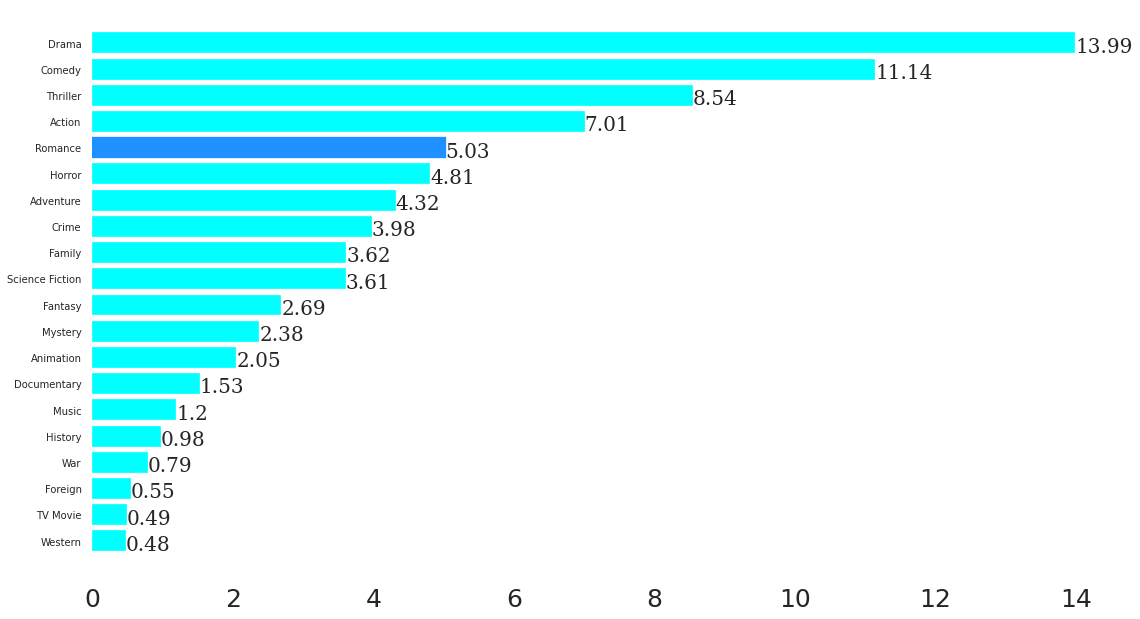

In [19]:
help_ploting(genre_df,15)

In [20]:
pv = pd.pivot_table(df, columns=df['release_year'],
                    values=['Action', 'Comedy','Drama', 'Romance','Thriller'], aggfunc='sum')

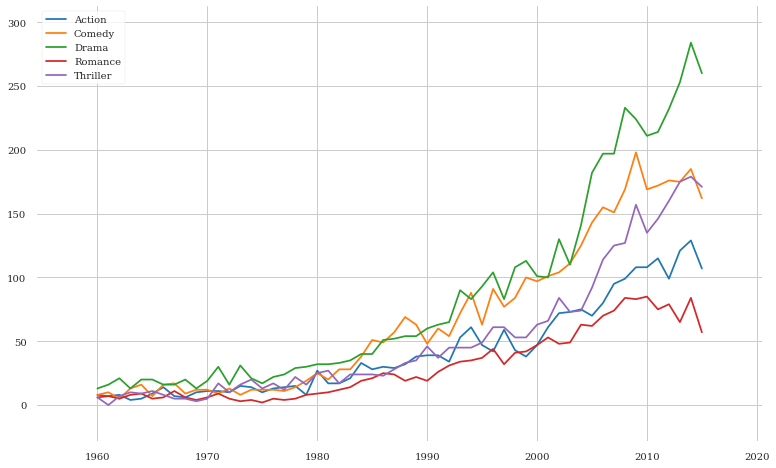

In [21]:
fig, ax = plt.subplots(figsize=(13, 8))
for col in pv.T.columns:
    plt.plot(pv.T.index.values,pv.T[col].values,label=col)
ax.legend()
ax.margins(y=.1, x=.1)
plt.grid(True)

<a id='Observation-2'></a>
## Observation-2
### What are the Characteristics of high revenue movies?

In [22]:
df['revenue_adj'].describe()

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [23]:
df.columns

Index(['popularity', 'budget', 'revenue', 'runtime', 'genres', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [24]:
subdf = df[['popularity','budget_adj','revenue_adj','vote_average','runtime']]

In [25]:
subdf

popularity    budget_adj   revenue_adj  vote_average  runtime
0       32.985763  1.379999e+08  1.392446e+09           6.5      124
1       28.419936  1.379999e+08  3.481613e+08           7.1      120
2       13.112507  1.012000e+08  2.716190e+08           6.3      119
3       11.173104  1.839999e+08  1.902723e+09           7.5      136
4        9.335014  1.747999e+08  1.385749e+09           7.3      137
...           ...           ...           ...           ...      ...
10861    0.080598  0.000000e+00  0.000000e+00           7.4       95
10862    0.065543  0.000000e+00  0.000000e+00           5.7      176
10863    0.065141  0.000000e+00  0.000000e+00           6.5       94
10864    0.064317  0.000000e+00  0.000000e+00           5.4       80
10865    0.035919  1.276423e+05  0.000000e+00           1.5       74

[10866 rows x 5 columns]

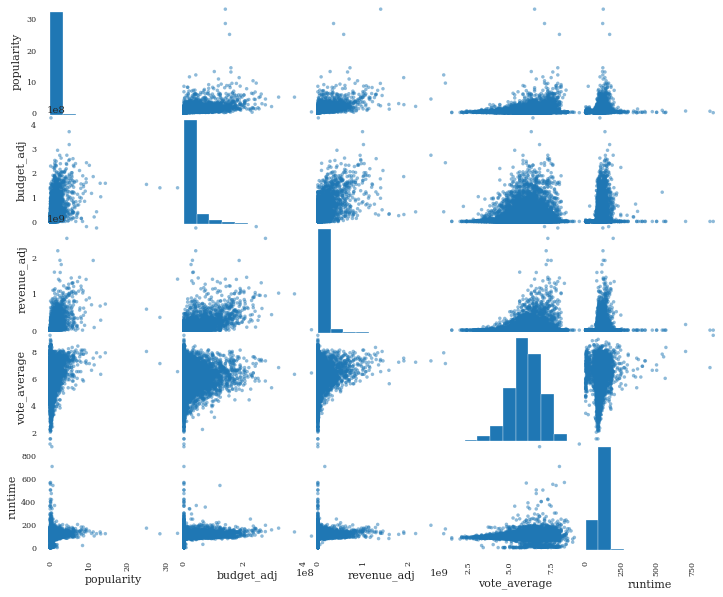

In [26]:
pd.plotting.scatter_matrix(subdf,figsize=(12,10));

In [27]:
report2 = ProfileReport(subdf,explorative=True)

/home/himanshu/.local/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
report2

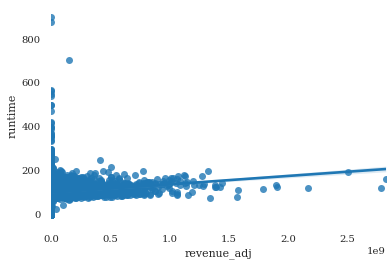

In [29]:
sb.regplot(subdf['revenue_adj'],subdf['runtime'])

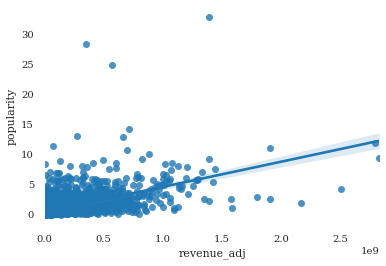

In [30]:
sb.regplot(subdf['revenue_adj'],subdf['popularity'])

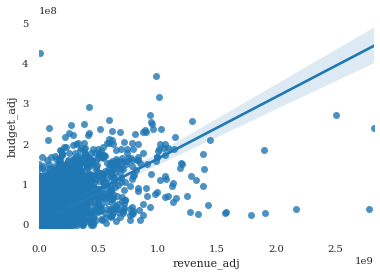

In [31]:
sb.regplot(subdf['revenue_adj'],subdf['budget_adj'])

In [32]:
sb.regplot(subdf['revenue_adj'],subdf['vote_average'])

<a id='conclusions'></a>
## Conclusions

<ul>
<li><a href="#Observation-1">Popular Genres</a></li>
<li><a href="#Observation-2">High Revenue movies</a></li>
</ul>

In case of Popular Genres we have seen that  these **(['Action', 'Comedy','Drama', 'Romance','Thriller'])** are most popular from 1960 to 2015.

>From 1980 onwards we can clearly see that the film industry has been rising very sharply mainly because of
the commercial, public screening of ten of Lumière brothers short films in Paris on 1895 can be regarded as the breakthrough of projected cinematographic motion pictures. 


So from 1980 onwards as more or more people start watching movies because of this number of movies start getting  produced.

From 1980 to 2000 we can see that there is competition  between Thriller,action and romance but after we have clear winner that is Thriller.

**Position of Popularity  Genre:**

1.Drama

2.Comedy

3.Thriller

4.Action

5.Romance

In case of high revenue movies i have compare revenue to the **[budget_adj,popularity,vote_avaerage,runtime]**

**Position of high revenue movies Characteristics**

1.vote average

2.budget

3.popularity

4.runtime


**more budget,vote a movie have more it revenue it have**

runtime and popularity also have  a positive factor but they don't infulence movies so much.